# Домашнее задание по занятию 22

## Цель:

Освоить метод главных компонент (PCA) и понять, как он может быть использован для снижения размерности данных, сохраняя при этом максимум информации.

### Задачи:

1. **Подготовка данных**:
    - Загрузите набор данных, содержащий многомерные данные (например, набор данных о цветках `Iris`).
    - Разделите данные на обучающую и тестовую выборки.
  
2. **Исследование исходных данных**:
    - Визуализируйте данные в исходном пространстве. Если у вас более 3 признаков, выберите 2 или 3 из них для отображения.
    - Оцените распределение данных: есть ли кластеры или выбросы?
  
3. **Применение PCA**:
    - Примените PCA ко всему датасету, чтобы вычислить главные компоненты.
    - Визуализируйте долю объясненной дисперсии в зависимости от количества главных компонент.
    - Определите минимальное количество компонент, необходимое для сохранения 95% исходной дисперсии.

4. **Снижение размерности**:
    - Примените PCA с выбранным количеством компонент.
    - Визуализируйте преобразованные данные в новом пространстве главных компонент.

5. **Оценка эффективности** (дополнительно):
    - Обучите простую модель (например, логистическую регрессию) на исходных данных и на данных после снижения размерности с использованием PCA.
    - Сравните метрики качества на тестовой выборке для обеих моделей. Улучшилось ли качество после применения PCA?

### Подсказки:

- Используйте библиотеки `numpy`, `pandas`, `matplotlib` и `sklearn` для выполнения задачи.
- Помните, что цель PCA - не только снижение размерности, но и интерпретация структуры данных. Попробуйте интерпретировать главные компоненты.

### При успешном выполнении вы сможете:

- Понять, как PCA может быть использован для снижения размерности.
- Определить количество главных компонент для сохранения большей части информации.
- Интерпретировать направления главных компонент и их влияние на исходные данные.

## Выполнение задания

In [13]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_linnerud, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

### Задача регрессии

In [3]:
# Загрузка данных
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

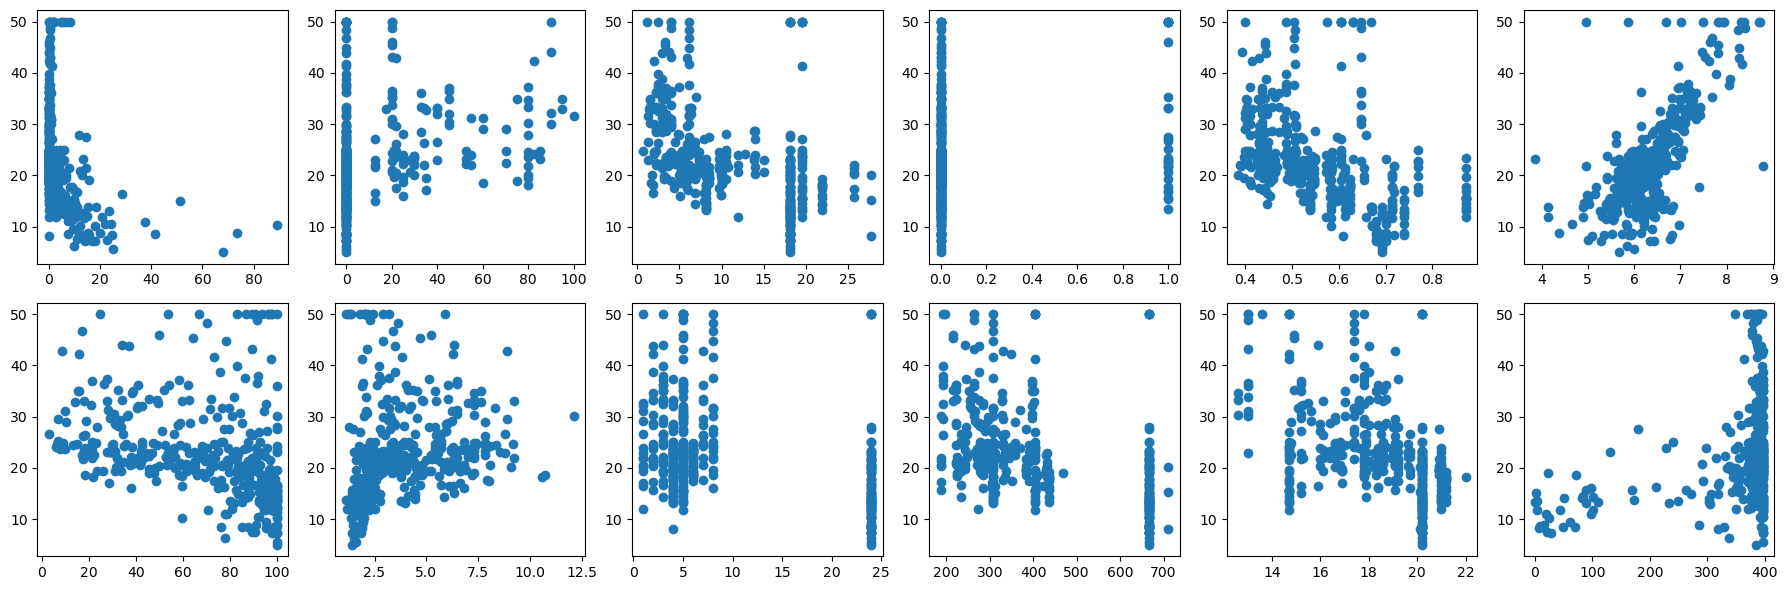

In [30]:
# Визуализация
n_row = 2
n_col = 6

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3))

for i, ax in enumerate(fig.axes):
    ax.scatter(x=X_train[:,i], y=y_train)
fig.tight_layout()
plt.show()

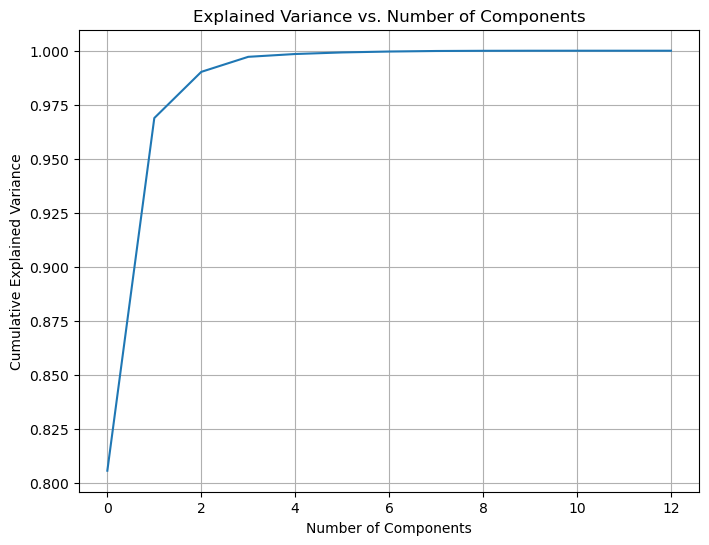

In [31]:
# Применение PCA ко всему датасету
pca = PCA().fit(X)

# Визуализация PCA
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Одна компонента гарантирует сохранение информации на 95%

In [38]:
explained_var_ratios = []
components_range = range(1, min(X.shape[1], len(set(y))))
for n_components in components_range:
    lda = LDA(n_components=n_components)
    lda.fit(X, y)
    explained_var_ratios.append(np.sum(lda.explained_variance_ratio_))

range(1, 13)